In [1]:
import requests

from config import weather_api_key

from datetime import datetime

import time

from citipy import citipy

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
         citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kailua us
santa barbara mx
bluff nz
lata sb
port elizabeth za
anadyr ru
vaini to
puerto ayora ec
barrow us
nelson ca
husavik is
atuona pf
rikitea pf
jamestown sh
puerto lumbreras es
nikolskoye ru
dmitriyevka ru
georgetown sh
bandarbeyla so
nizhneyansk ru
victoria sc
butaritari ki
mys shmidta ru
banjar id
torbay ca
busselton au
butaritari ki
gaborone bw
saint-francois gp
rikitea pf
busselton au
geraldton ca
ushuaia ar
yarmouth ca
mahebourg mu
ribeira grande pt
butaritari ki
port elizabeth za
aklavik ca
bethel us
guilin cn
tambacounda sn
urzhum ru
mataura pf
puerto ayora ec
ancud cl
hobart au
port augusta au
atuona pf
new norfolk au
mataura pf
camacari br
usevya tz
rikitea pf
yellowknife ca
kiama au
rikitea pf
hobart au
bluff nz
cabo san lucas mx
norman wells ca
road town vg
limon cr
atuona pf
sahuaripa mx
puerto ayora ec
hilo us
punta arenas cl
torata pe
albany au
bosaso so
busselton au
iqaluit ca
north bend us
illoqqortoormiut gl
hermanus za
hermanus za
abidjan ci
rikitea pf
barrow us


In [4]:
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    if city not in cities:
        cities.append(city)

len(cities)

614

In [5]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial'

city = 'Boston'

query_url = f'{url}&appid={weather_api_key}'



In [6]:
lat = request["coord"]["lat"]
lng = request["coord"]["lon"]
max_temp = request["main"]["temp_max"]
humidity = request["main"]["humidity"]
clouds = request["clouds"]["all"]
wind = request["wind"]["speed"]

print(lat, lng,max_temp,humidity,clouds,wind)



NameError: name 'request' is not defined

In [ ]:
date = request["dt"]

datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-12-08 01:35:09'

In [ ]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

KeyboardInterrupt: 

In [8]:
city_data =[]

print("Beinning Data Retrieval ")
print("----------------------- ")

#counters
record_count = 1 
set_count = 1

for i, city in enumerate(cities):

    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
        time.sleep(5)

    request_url = query_url + "&q=" + city.replace(" ","+")

    print(f"Processing Record {record_count} of set {set_count} | {city}")

    record_count += 1

    try:
            # Parse the JSON and retrieve data.
        city_weather = requests.get(request_url).json()
            # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beinning Data Retrieval 
----------------------- 
Processing Record 1 of set 1 | kailua
Processing Record 2 of set 1 | santa barbara
Processing Record 3 of set 1 | bluff
Processing Record 4 of set 1 | lata
Processing Record 5 of set 1 | port elizabeth
Processing Record 6 of set 1 | anadyr
Processing Record 7 of set 1 | vaini
Processing Record 8 of set 1 | puerto ayora
Processing Record 9 of set 1 | barrow
Processing Record 10 of set 1 | nelson
Processing Record 11 of set 1 | husavik
Processing Record 12 of set 1 | atuona
Processing Record 13 of set 1 | rikitea
Processing Record 14 of set 1 | jamestown
Processing Record 15 of set 1 | puerto lumbreras
Processing Record 16 of set 1 | nikolskoye
Processing Record 17 of set 1 | dmitriyevka
Processing Record 18 of set 1 | georgetown
Processing Record 19 of set 1 | bandarbeyla
Processing Record 20 of set 1 | nizhneyansk
City not found. Skipping...
Processing Record 21 of set 1 | victoria
Processing Record 22 of set 1 | butaritari
Processing R

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kailua,21.4022,-157.7394,76.14,75,42,7.00,US,2022-12-10 18:38:11
1,Santa Barbara,34.7333,-120.0343,54.30,91,100,4.61,US,2022-12-10 18:40:54
2,Bluff,-46.6000,168.3333,53.37,91,100,5.17,NZ,2022-12-10 18:40:54
3,Lata,40.1629,-8.3327,51.08,80,100,1.50,PT,2022-12-10 18:40:55
4,Port Elizabeth,-33.9180,25.5701,73.31,95,75,6.91,ZA,2022-12-10 18:40:55
5,Anadyr,64.7500,177.4833,23.50,92,75,17.90,RU,2022-12-10 18:37:56
6,Vaini,-21.2000,-175.2000,77.16,94,75,5.75,TO,2022-12-10 18:40:56
7,Puerto Ayora,-0.7393,-90.3518,84.16,88,100,5.99,EC,2022-12-10 18:40:56
8,Barrow,71.2906,-156.7887,10.42,85,100,14.97,US,2022-12-10 18:40:56
9,Nelson,-41.2833,173.2833,57.29,92,4,1.01,NZ,2022-12-10 18:38:36


In [ ]:
output_data_file = "weather_data/cities.csv"

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
today = time.strftime("%x")
today

'12/08/22'

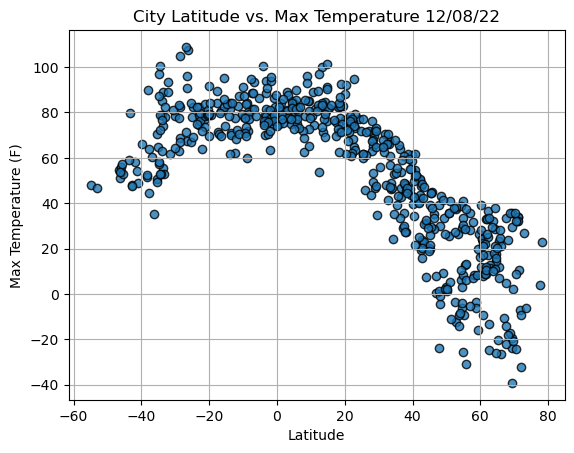

In [ ]:

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lats,max_temps,edgecolors="black",linewidths=1,marker='o',alpha=0.8,label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

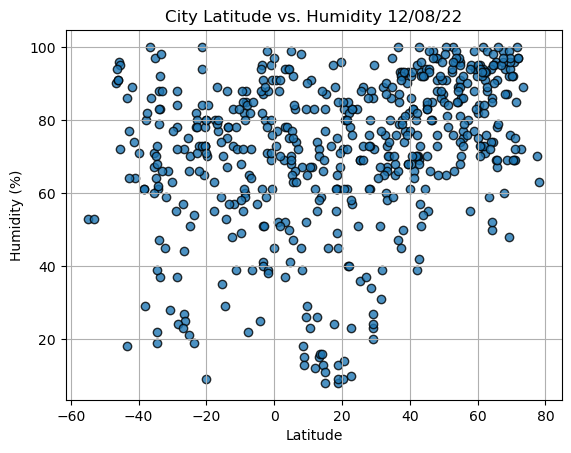

In [ ]:
plt.scatter(lats, humidity,edgecolors="black",linewidths=1,marker='o',alpha=0.8,label="Cities")
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

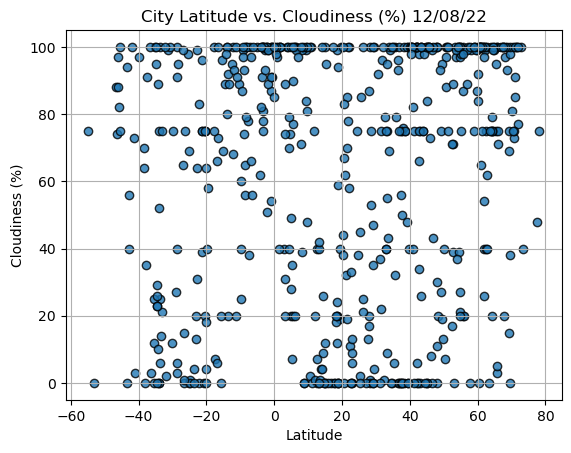

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

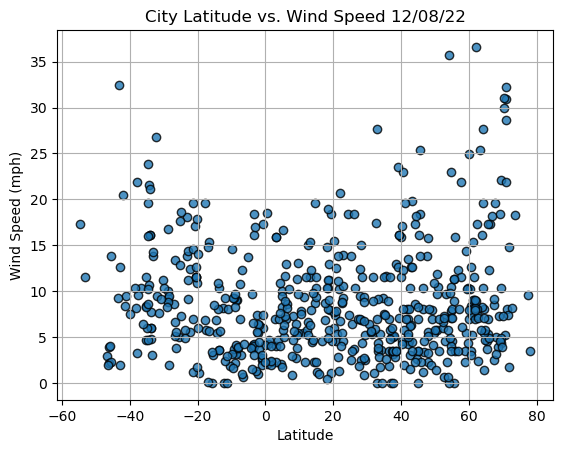

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
from scipy.stats import linregress

def plot_linear_regres(x_values, y_values, title, y_lable, text_coordinates):

    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope, 2)) + "x +  " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r")

    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    plt.title(title)

    plt.xlabel('Latitude')

    plt.ylabel(y_lable)

    plt.show()


In [31]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]< 0)]

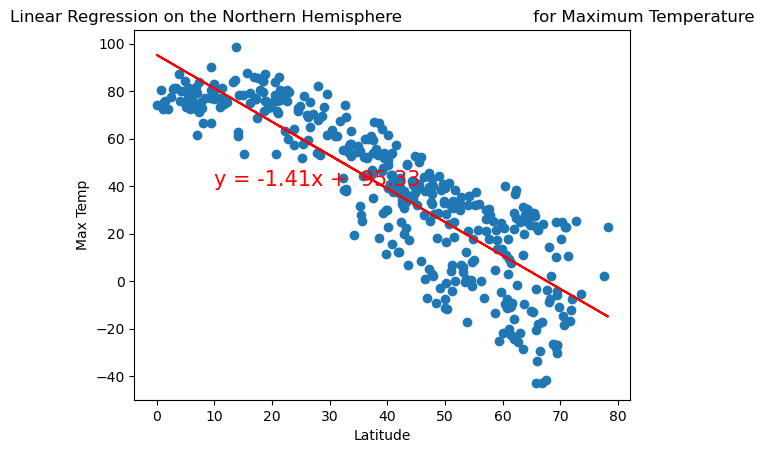

In [32]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regres(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

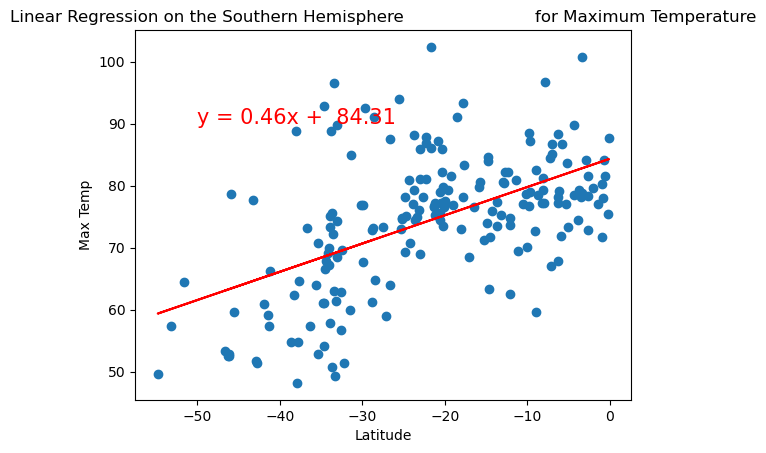

In [34]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regres(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

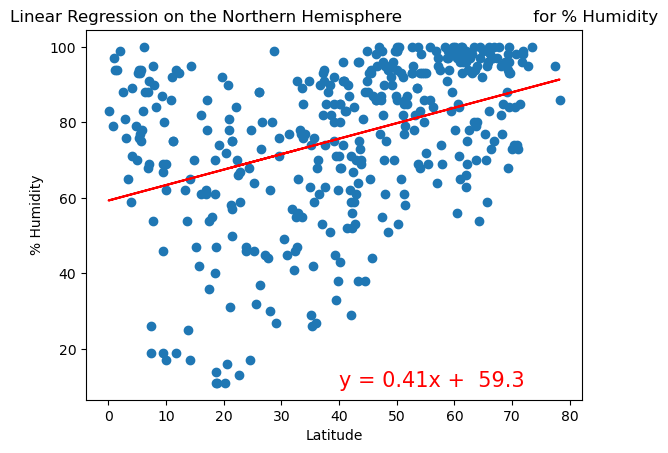

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regres(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

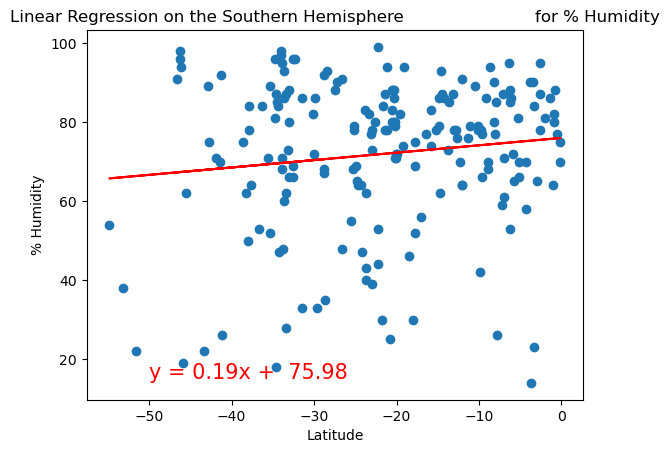

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regres(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

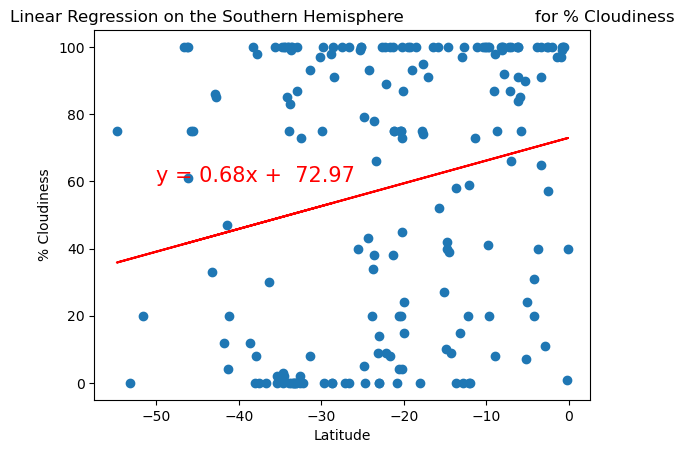

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regres(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

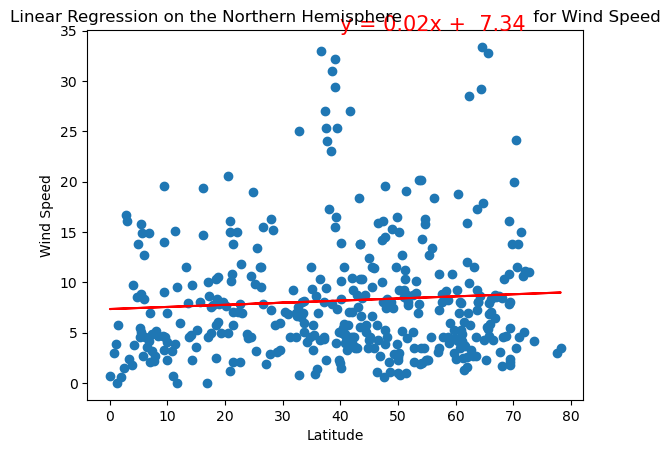

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regres(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

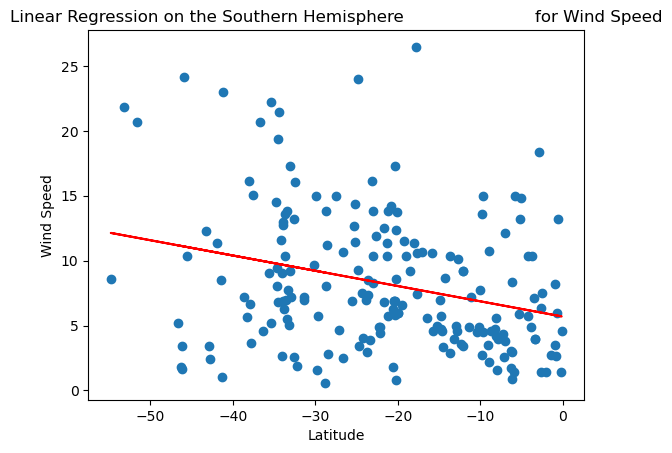

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regres(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [41]:
import hvplot.pandas

import pandas as pd

import warnings

warnings.filterwarnings("ignore")

In [ ]:
city